In [117]:
#importing necessary librarires
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv('HR-Employee-Attrition.csv')

In [119]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
df.shape

(1470, 35)

In [22]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Dataset Description


Introduction:

        Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

What is HR Analytics?

       Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic    processes to the human resource department of an organization in the hope of improving employee performance and therefore  getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant  decisions about how to improve these processes.

Attrition in HR:

       Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

Attrition affecting companies:

        A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time.   This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar  people. Errors and issues are more likely if you constantly have new workers.

->There are totally 1470 rows and 35 columns in this dataset and the columns are given as follows:

1.Age

2.Attrition

3.BusinessTravel

4.DailyRate

5.Department

6.DistanceFromHome

7.Education

8.EducationField

9.EmployeeCount

10.EmployeeNumber

11.EnvironmentSatisfaction

12.Gender

13.HourlyRate

14.JobInvolvement

15.JobLevel

16.JobRole

17.JobSatisfaction

18.MaritalStatus

19.MonthlyIncome

20.MonthlyRate

21.NumCompaniesWorked

22.Over18

23.OverTime

24.PercentSalaryHike

25.PerformanceRating

26.RelationshipSatisfaction

27.StandardHours

28.StockOptionLevel

29.TotalWorkingYears

30.TrainingTimesLastYear

31.WorkLifeBalance

32.YearsAtCompany

33.YearsInCurrentRole

34.YearsSinceLastPromotion

35.YearsWithCurrManager

# Aim of the project

Our aim is to predict the employee attrition rate from the given dataset and analyse the dataset using various techniques like Exploratory Data Analysis, building the model for prediction, finding the best model on the basis of the metrics values, increasing the accuracy using hyperparameter tuning and saving the model.As we need to predict the Attrition rate, which has categorical data, we need to follow classification process.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are various categorical columns present in the dataset and we need to convert them into numerical data in the further process



In [24]:
df.isnull().sum()   #Checking for null values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Analysis

In [25]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EmployeesCount,StandardHours std is zero it can be eliminated

In [120]:
#Dropping EmployeesCount,StandardHours
df.drop(['EmployeeCount','StandardHours'],axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [27]:
#we can create a column 'left' to understand attrition in betterway
attr_map={'Yes':1,'No':0}
df['left']=df['Attrition'].map(attr_map)

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [29]:
#Checking the number of attritions(Yes/No) in the dataset using value_counts
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We see that the dataset is imbalanced because there are more 0's than 1's.We willuse SMOTE technique to balance the dataset

<AxesSubplot:xlabel='Attrition', ylabel='count'>

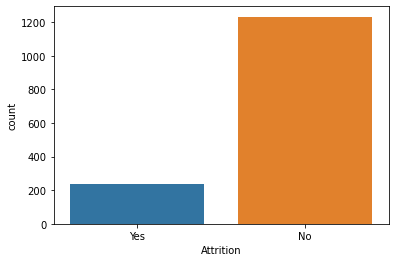

In [30]:
sns.countplot(x='Attrition', data=df)  #Plotting the attrition rate using countplot

There are 237 records of employees having attrition and 1233 records of employees are not having attrition



In [31]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
left                        1.844366
d

# Analysis of Each Column

# Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

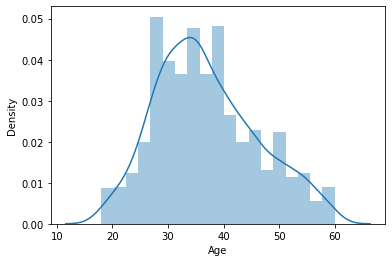

In [32]:
sns.distplot(df['Age'])

In [33]:
There is no skewness in age

SyntaxError: invalid syntax (<ipython-input-33-bd3f5ac224f8>, line 1)

<AxesSubplot:xlabel='Age'>

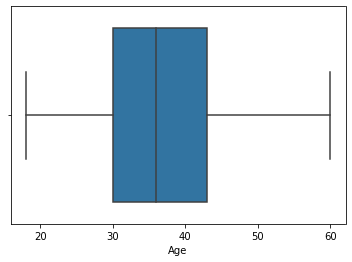

In [34]:
sns.boxplot(df['Age'])

There are no visible outliers in the age,most of the employees are between 30-40 years and minimum age is around 18 years and maximum is 60

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

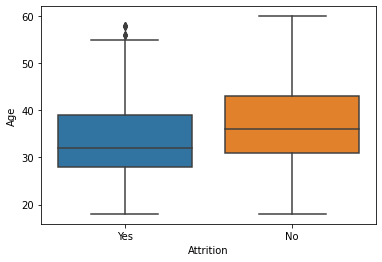

In [35]:
sns.boxplot(y=df['Age'],x=df['Attrition'])

Majority of employees who left the company are between 28-39 but there some outliers.Thses outliers may also be considered for our analysis.Employees between 35-43 years stayed in the same company.

# Daily Rate

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

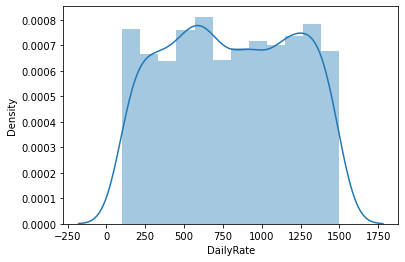

In [36]:
sns.distplot(df['DailyRate'])

<AxesSubplot:xlabel='DailyRate'>

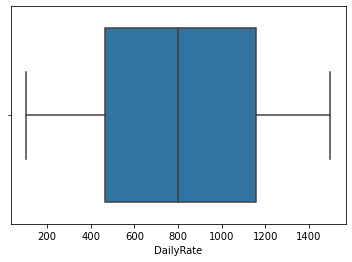

In [37]:
sns.boxplot(df['DailyRate'])

There might be no outliers in the data

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

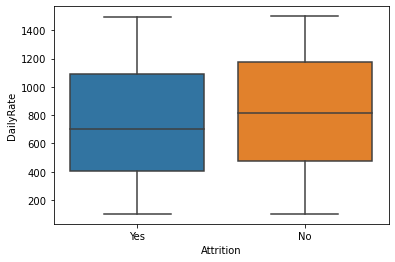

In [38]:
sns.boxplot(y=df['DailyRate'],x=df['Attrition'])

It can be seen that employees whose daily rate is high having donot switch

# Monthly Income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

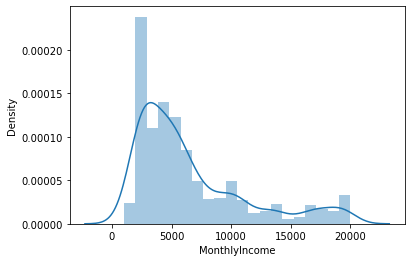

In [39]:
sns.distplot(df['MonthlyIncome'])

There is very high skewness to be removed from the MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome'>

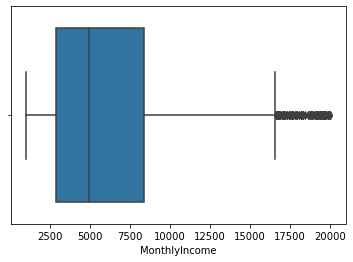

In [40]:
sns.boxplot(df['MonthlyIncome'])

In [41]:
There are so many outliers.But sometimes these otliers can also be genuine data which helps us to train the model.

SyntaxError: invalid syntax (<ipython-input-41-c7926369fedd>, line 1)

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

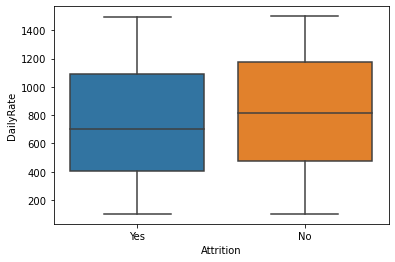

In [42]:
sns.boxplot(y=df['DailyRate'],x=df['Attrition'])

It can be seen that employees whose daily rate is high having donot switch

# PercentSalaryHike

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

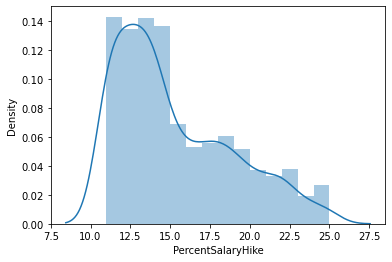

In [43]:
sns.distplot(df['PercentSalaryHike'])

thereis skewness in this column

<AxesSubplot:xlabel='PercentSalaryHike'>

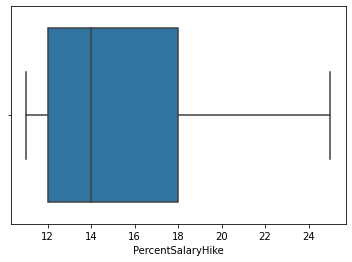

In [44]:
sns.boxplot(df['PercentSalaryHike'])

There are no outliers in this column

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

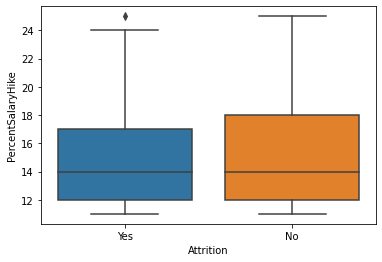

In [45]:
sns.boxplot(y=df['PercentSalaryHike'],x=df['Attrition'])

 employee's who received less salary hike have left the company.

# Total Working years

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

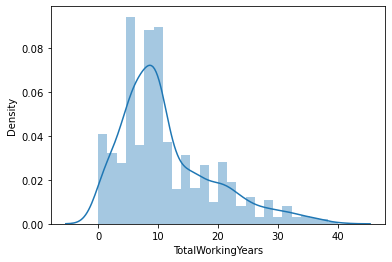

In [46]:
sns.distplot(df['TotalWorkingYears'])

<AxesSubplot:xlabel='TotalWorkingYears'>

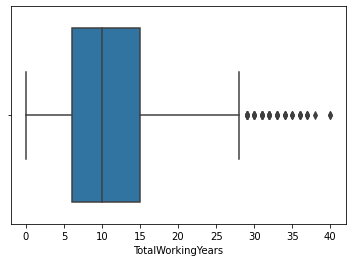

In [47]:
sns.boxplot(df['TotalWorkingYears'])

There are outliers in the data

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

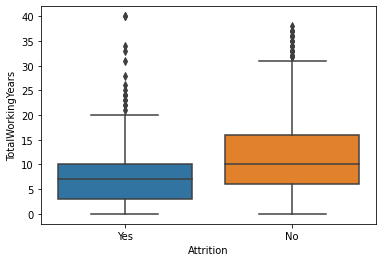

In [48]:
sns.boxplot(y=df['TotalWorkingYears'],x=df['Attrition'])

Attrition is high with employees having less number of total working years

# JobSatisfaction

sns.countplot(x='JobSatisfaction',data=df,hue='Attrition')

Attrition  is less when Job satisfaction is more

Text(0, 0.5, 'Attrition(Average)')

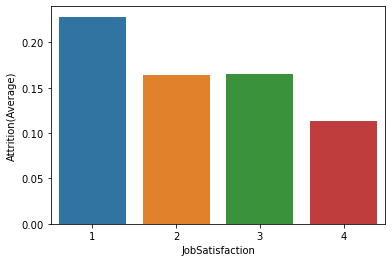

In [49]:
sns.barplot(x='JobSatisfaction',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')


In [50]:
df.groupby('JobSatisfaction')['Attrition'].mean()

DataError: No numeric types to aggregate

Observation:As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

# Performance Rating

In [51]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [52]:
df.groupby('PerformanceRating')['left'].mean()*100

PerformanceRating
3    16.077170
4    16.371681
Name: left, dtype: float64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

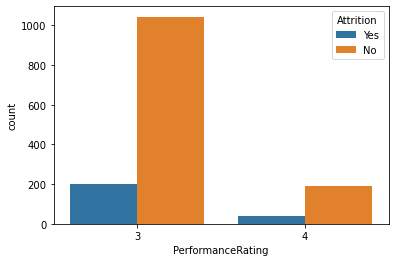

In [53]:
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')

Text(0, 0.5, 'Attrition(Average)')

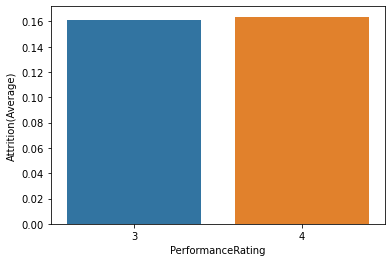

In [54]:
sns.barplot(x='PerformanceRating',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')


Observations:        
1.High rating employees will stay with the company are more than those who leave.                                            
       2.   Average attrition for each performance rating is almost same            

# Job Involvement

In [55]:
df['JobInvolvement']

0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64

In [56]:
pd.crosstab(df['JobInvolvement'],df['Attrition'])

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

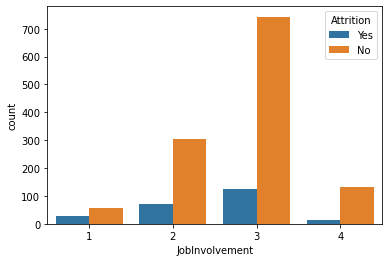

In [57]:
sns.countplot(x='JobInvolvement',data=df,hue='Attrition')

Out of total(55+28=83)who lowest job involvement 28 ie more than 33% left the company,among those who have high(3&4) involvement 15% left the company 

In [58]:
df['JobInvolvement'].value_counts()*100/df.shape[0]

3    59.047619
2    25.510204
4     9.795918
1     5.646259
Name: JobInvolvement, dtype: float64

In the total employee count 59% of employees have high job involvement and 25% medium job involvement and less than 10% with low job satisfaction

Text(0, 0.5, 'Attrition(Average)')

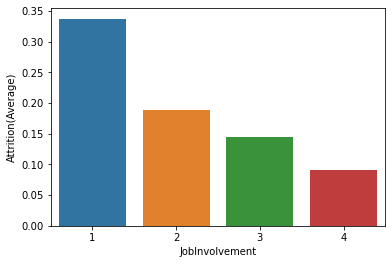

In [59]:
sns.barplot(x='JobInvolvement',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

from above plot we can see that low job involvement  employees have high attrition

# RelationshipSatisfaction

In [60]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [61]:
pd.crosstab(df['RelationshipSatisfaction'],df['Attrition'])

Attrition,No,Yes
RelationshipSatisfaction,,
1,219,57
2,258,45
3,388,71
4,368,64


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

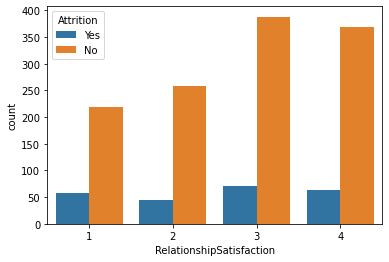

In [62]:
sns.countplot(x='RelationshipSatisfaction',data=df,hue='Attrition')

Text(0, 0.5, 'Attrition(Average)')

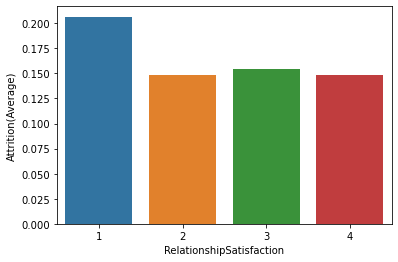

In [63]:
sns.barplot(x='RelationshipSatisfaction',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

There is no visible trend among RelationshipSatisfaction  Attrition but among low RelationshipSatisfaction Attriton average is high.Around 15% employees left the company who has given 3 job satisfaction,Around 15% employees left the company who has given4 job satisfaction

# WorkLifeBalance

In [64]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [65]:
pd.crosstab(df['WorkLifeBalance'],df['Attrition'])

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

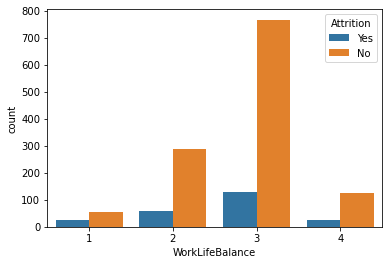

In [66]:
sns.countplot(x='WorkLifeBalance',data=df,hue='Attrition')

In [67]:
30% employees left who have rated very bad worklifebalance(1),17% employees left who have rated higest worklifebalance(4)

SyntaxError: invalid syntax (<ipython-input-67-edbdd9e0c5d4>, line 1)

Text(0, 0.5, 'Attrition(Average)')

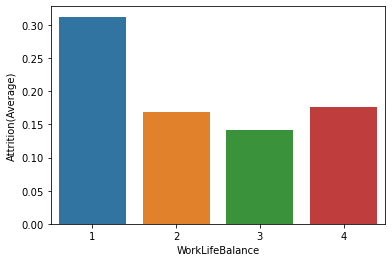

In [68]:
sns.barplot(x='WorkLifeBalance',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

# BusinessTravel

In [69]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [70]:
pd.crosstab(df['BusinessTravel'],df['Attrition'])

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

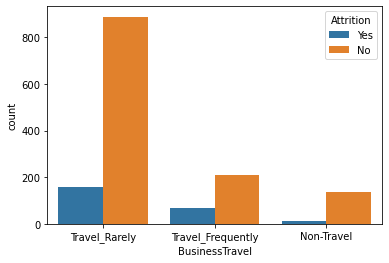

In [71]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')


Text(0, 0.5, 'Attrition(Average)')

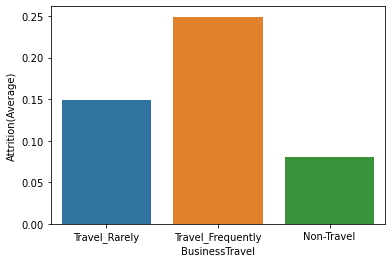

In [72]:
sns.barplot(x='BusinessTravel',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

Frequent travel Atrrition rate is high,24% employees left company with frequnt bussiness travel and it is very low for non travel.It is also seen that most of employeees travel rarely

# Department

In [73]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [74]:
pd.crosstab(df['Department'],df['Attrition'])

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


<AxesSubplot:xlabel='Department', ylabel='count'>

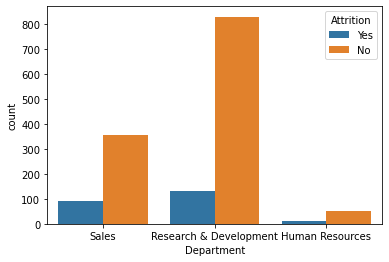

In [75]:
sns.countplot(x='Department',data=df,hue='Attrition')


Text(0, 0.5, 'Attrition(Average)')

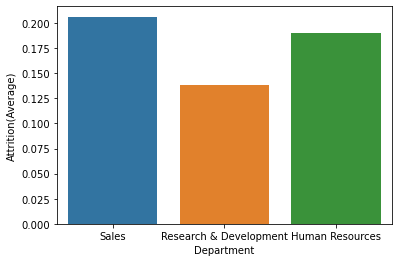

In [76]:
sns.barplot(x='Department',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

Sales team Atrrition is high,around 20% and R&D has got lowest attrition around 13% and HR dept has got 19% attrition

# EducationField

In [78]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [79]:
pd.crosstab(df['EducationField'],df['Attrition'])

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


<AxesSubplot:xlabel='count', ylabel='EducationField'>

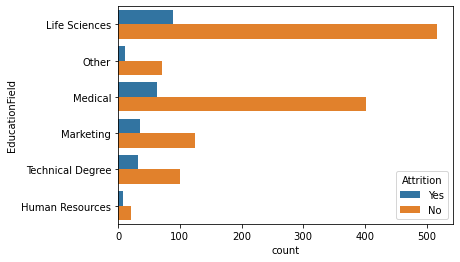

In [80]:
sns.countplot(y='EducationField',data=df,hue='Attrition')

Text(0.5, 0, 'Attrition(Average)')

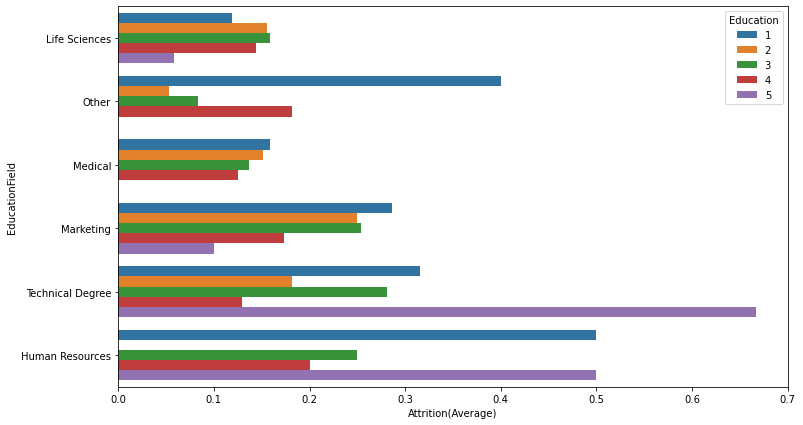

In [81]:
plt.figure(figsize=(12,7))
sns.barplot(y='EducationField',x='left',data=df,hue='Education',ci=None)
plt.xlabel('Attrition(Average)')

1-There are more people with a Life sciences followed by medical and marketing                                             
2-In HR Education field Attrition is highest around 26%                                                                     
3-In Technical degree Atrrition is around 24%                                                                               
4-Attrition is high for high education level                                                                                   

# EnvironmentSatisfaction

In [82]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [83]:
pd.crosstab(df['EnvironmentSatisfaction'],df['Attrition'])

Attrition,No,Yes
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

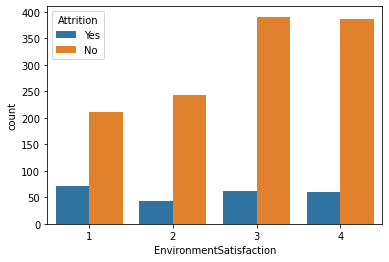

In [84]:
sns.countplot(x='EnvironmentSatisfaction',data=df,hue='Attrition')

Text(0, 0.5, 'Attrition(Average)')

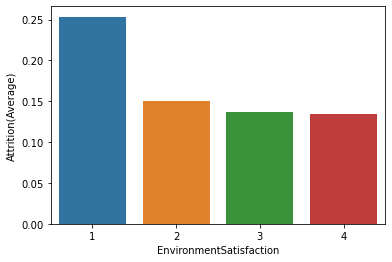

In [85]:
sns.barplot(x='EnvironmentSatisfaction',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

1-Highest attrition is for least EnvironmentSatisfaction,it is arround 25%  followed by 2,3,4 EnvironmentSatisfaction levels                                             


# MaritalStatus

In [86]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [87]:
pd.crosstab(df['MaritalStatus'],df['Attrition'])

Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

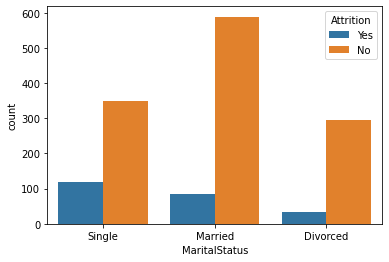

In [88]:
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')

Text(0, 0.5, 'Attrition(Average)')

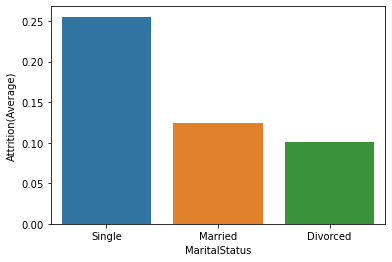

In [89]:
sns.barplot(x='MaritalStatus',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

In [90]:
Single attrition is highest followed by Married

SyntaxError: invalid syntax (<ipython-input-90-7333aa545ae7>, line 1)

# Gender

In [91]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [92]:
pd.crosstab(df['Gender'],df['Attrition'])

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


<AxesSubplot:xlabel='Gender', ylabel='count'>

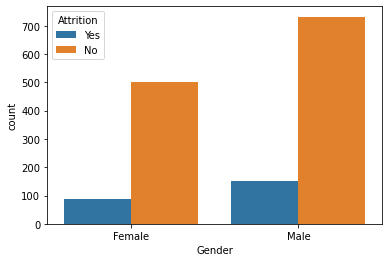

In [93]:
sns.countplot(x='Gender',data=df,hue='Attrition')

Text(0, 0.5, 'Attrition(Average)')

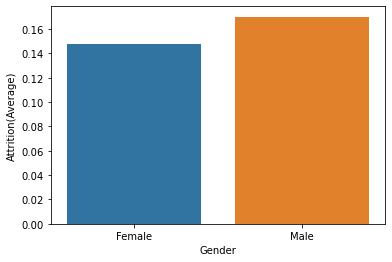

In [94]:
sns.barplot(x='Gender',y='left',data=df,ci=None)
plt.ylabel('Attrition(Average)')

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

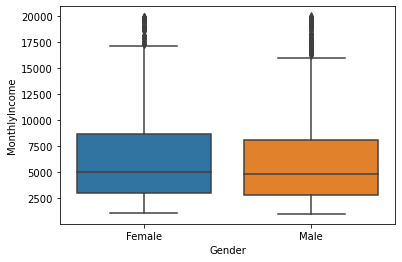

In [95]:
sns.boxplot(x='Gender',y='MonthlyIncome',data=df)

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

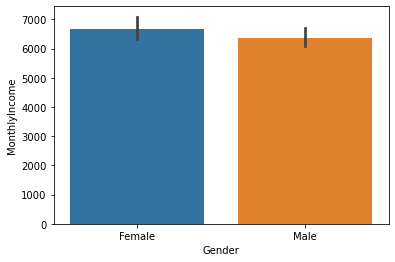

In [96]:
sns.barplot(x='Gender',y='MonthlyIncome',data=df)

1-We also see that Monthly income distribution of male and female is almost the same.                                       
2-Atrrirtion of female is around 15% and Attrition of male is around 17% there is very less difference between both.Attrition not depending much gender.                                                        

In [97]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'left'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='DistanceFromHome'>

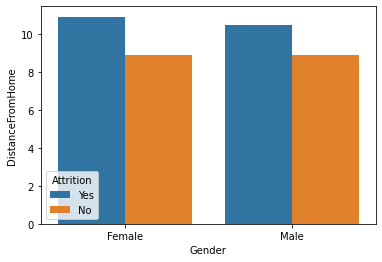

In [98]:
sns.barplot(x='Gender',y='DistanceFromHome',data=df,hue="Attrition",ci=False)

Disance from home effects attrition.Infact it matters more for women.

<AxesSubplot:xlabel='Gender', ylabel='YearsAtCompany'>

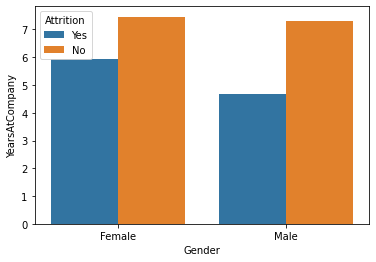

In [99]:
sns.barplot(x='Gender',y='YearsAtCompany',data=df,hue="Attrition",ci=False)

Female employees who spent an average of around 6 years(for men it is around 4.5years) in the company are more inclined to switch

# Job Role

In [100]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [101]:
pd.crosstab(df['JobRole'],df['Attrition'])

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


<AxesSubplot:xlabel='count', ylabel='JobRole'>

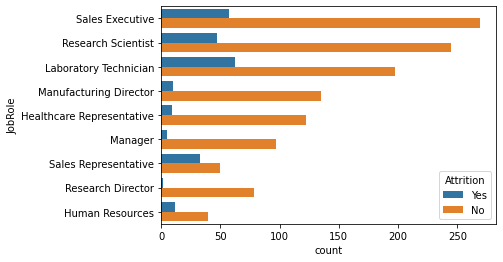

In [102]:
sns.countplot(y='JobRole',data=df,hue='Attrition')

In [103]:
Sales Executive employees are highest followed by ,Research scientiist follwed by laboratory technician.

SyntaxError: invalid syntax (<ipython-input-103-04211ab6e864>, line 1)

Text(0.5, 0, 'Attrition(Average)')

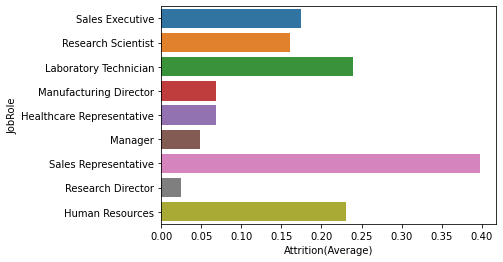

In [104]:
sns.barplot(y='JobRole',x='left',data=df,ci=None)
plt.xlabel('Attrition(Average)')

Atrrition(average) is high for Sales representative which is around 40% followe by HR and Lab Technician

# Checking Collinearity

In [105]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105


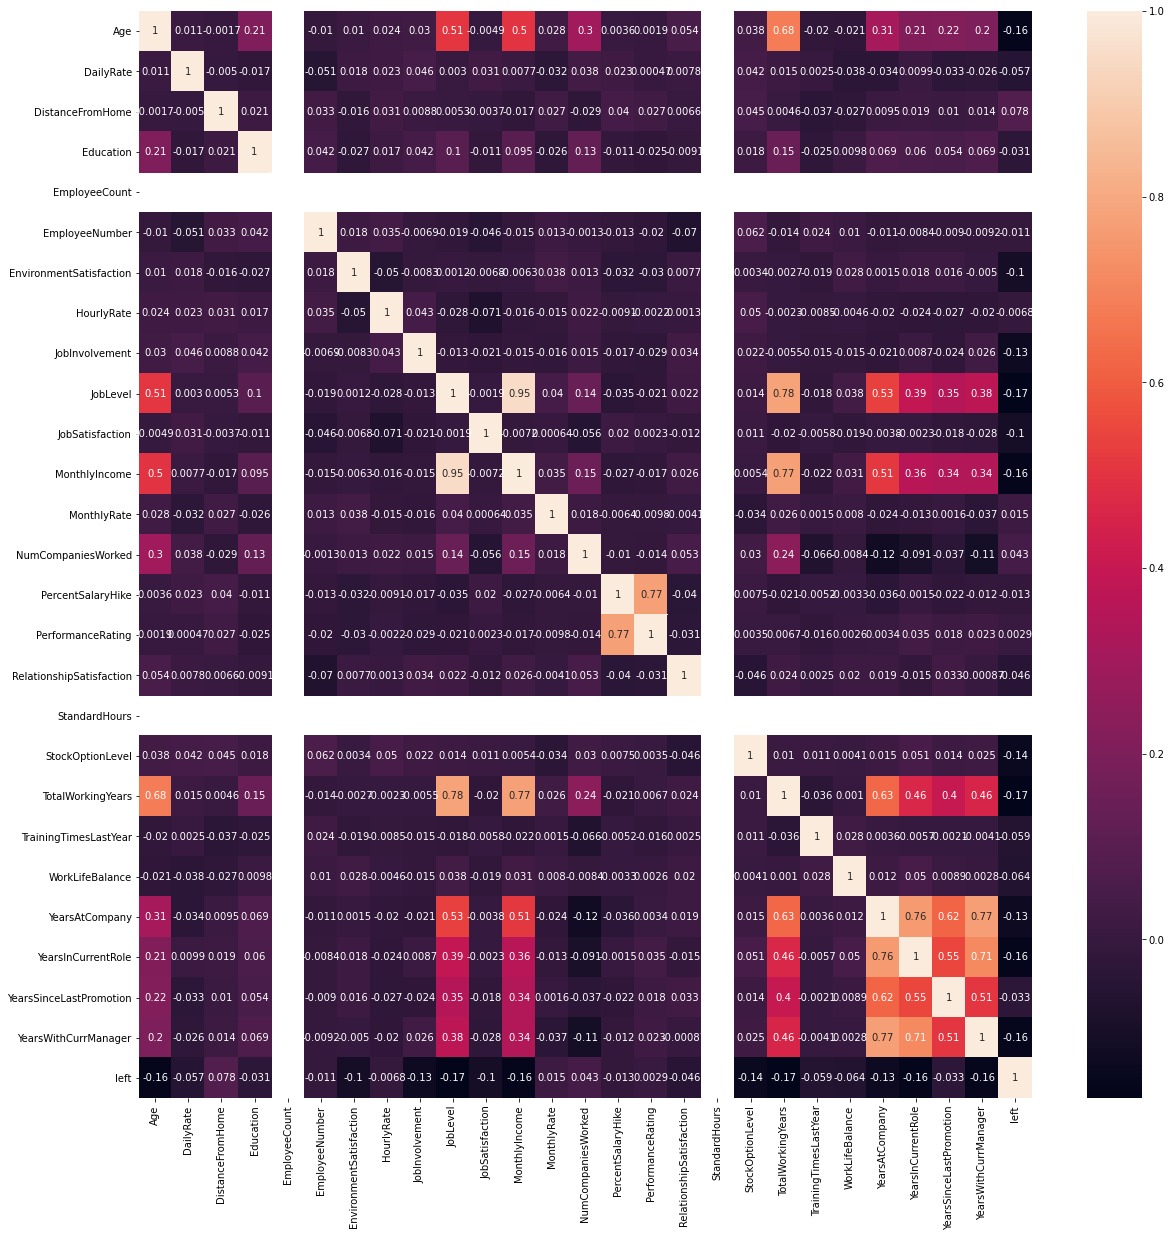

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

From heatmap we can conclude that: 1.Age and Total working years are positively correlated i.e, 68% with each other . 2.YearsAtCompany,Years with same Manager are positively correalted with each othermore than 70%. 3.YearsAt Company and YearsInSameRole are positively correalted with each other more than 70%. 4.JobLevel and Total Working years are positively correalted with each other more than 70%. 5.PerformanceRating and PercentSalaryHike are positively correalted with each other more than 70%.

# Data Preprocessing

In [121]:
df.shape

(1470, 35)

In [ ]:
#we can dropoff left column as it is only generated for analysis purpose
df.drop('left',axis=1,inplace=True)

# Encoding

In [122]:
columns = []
for column in df.columns:
    if df[column].dtype == object:
            columns.append(column)

In [123]:
df[columns]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [126]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [127]:
for col in columns:
    df[col]=le.fit_transform(df[col])

In [128]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Checking outliers

we only check outliers for numerical data but categorical data,most of the columns are having value counts less than 6,so we should consider those columns as categorical and we should only perform outliers and skewness for value counts >20

Education,EmployeeCount,JobLevel,EnvironmentSatisfaction,PerformanceRating,StockOptionLevel,WorkLifeBalance are not numerical,these are categorical data as we have seen above in the EDA

In [ ]:
num_col = []
for column in df.columns:
    if df[column].dtype == 'int64':
        if column not in ['Education','EmployeeCount','JobLevel','EnvironmentSatisfaction','PerformanceRating','StockOptionLevel','WorkLifeBalance']:
            num_col.append(column)
            

In [ ]:
num_col

In [ ]:
for i in num_col:
    sns.boxplot(df[i])
    plt.show()

We see that there outliers in MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,
YearsSinceLastPromotion,YearsWithCurrManager columns

Although we see there are outliers but they are not errors,they can be genuine data which can help us in predicting the test outcomes

It is not necessary to remove outliers in every situation.Because outliers can be sometimes genuine data

In this dataset all these outliers seem genuine so we are going to build without removing outliers and chck its accuracy.

If we are having outliers in our data Tree based models can give us better results because they can handle outliers.

# Splitting Data features and labels

In [129]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

# Removing the imbalance in the data

In [130]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [131]:
# as there is imbalance in the data we need to use smote technique to remove imbalnce which help us to train model in a better way
SM = SMOTE()
x, y = SM.fit_resample(x,y)

# Using Tree based models

tree models can handle outliers,non gaussian distribution and scaling is also not required

In [ ]:
models = [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]
max_acc_score = 0
for i in range(40,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =i,test_size = 0.2)
    for model in models:
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)
        print("acc score correspond to random state " ,i ,"is", score)
        if score> max_acc_score:
            max_acc_score=score
            final_state = i
            final_model = model
            
print("max acc score correspond to random state " ,final_state , "is" , max_acc_score ,"and model is",final_model)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =85,test_size = 0.2)

# Checking Cross Validation Score

In [ ]:
scr=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("the cross validation score for logistic regression is",scr.mean())

In [ ]:
scr2=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("the cross validation score for decision tree classifier is",scr2.mean())

In [ ]:
scr3=cross_val_score(XGBClassifier(),x,y,cv=5)
print("the cross validation score for random forest classifier is",scr3.mean())

we see from above that RandomForestClassifier is giving maximum cv score

# HyperParameter tuning of Random Forest Classifier

In [132]:
param_grid={
               
               'max_features': ['auto','sqrt','log2'],
               
               
                'max_depth':[6,7,8,50],'criterion':['gini','entropy']}

In [133]:
GCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy')

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =99,test_size = 0.2)

In [135]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 50],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [137]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt'}

In [136]:
rf=RandomForestClassifier(criterion='gini',max_depth=50,max_features='auto')

In [138]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
score = accuracy_score(y_test,pred)
print("acc score is", score)

acc score is 0.9089068825910931


In [140]:
print(confusion_matrix(y_test,pred))

[[232  21]
 [ 24 217]]


In [142]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       253
           1       0.91      0.90      0.91       241

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



# AOC ROC Curve

In [ ]:
plot_roc_curve(rf,x_test,y_test)

Final Accuracy Score is 91.7% with Good AUC roc score of 97%

# Saving the model 

In [ ]:
joblib.dump(rf,"HRAnalystics.pkl")